In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir("../../../test_data/system_tests/proteoforms/mann_labs_egfr")


In [3]:
RESULTS_DIR = "results_minrep15_clustp001_clustermerge03"
RESULTS_DIR = "results"
RESULTS_PHOSPHO = "results_phospho_nocollapse"

CONDPAIR = ('egf_treated', 'untreated')
EGFR_PROTEINS = "egfr_proteins.tsv"
SAMPLEMAP = "samplemap_egfr_100ng.tsv"
UNIPROT2SYMBOL = "protein_mapping.tsv"

INPUT_FILE = "20230411_100022_20230330_Constantin_aQ2_Report.tsv.spectronaut_fragion_isotopes.aq_reformat.tsv"
INPUT_FILE_UNFORMATTED = "20230411_100022_20230330_Constantin_aQ2_Report.tsv"


ION2DIFFIDIST = {}
P2Z = {}
DEEDPAIR2DOUBLEDIFFDIST = {}

In [4]:
import pandas as pd

def get_protein2symbol_uniprot(uniprot2symbol_file):
    uniprot2symbol = pd.read_csv(uniprot2symbol_file, sep="\t")
    protein2symbol = dict(zip(uniprot2symbol["uniprot"], uniprot2symbol["symbol"]))
    return protein2symbol

def get_protein2symbol_egfr(egfr_proteins_file):
    egfr_proteins = pd.read_csv(egfr_proteins_file, sep="\t")
    protein2symbol = dict(zip(egfr_proteins["protein"], egfr_proteins["symbol"]))
    return protein2symbol

def get_egfr_related_protein_nodes(egfr_proteins_file, protein_nodes):
    egfr_proteins = pd.read_csv(egfr_proteins_file, sep="\t")["protein"].to_list()
    selected_protein_nodes = [x for x in protein_nodes if x.name in egfr_proteins]
    return selected_protein_nodes

def get_protein_nodes_of_interest_from_specified_list(list_of_interesting_symbols, uniprot2symbol_file, protein_nodes):
    symbol2uniprot = pd.read_csv(uniprot2symbol_file, sep="\t")[["symbol", "uniprot"]]
    symbol2uniprot_dict = dict(zip(symbol2uniprot["symbol"], symbol2uniprot["uniprot"]))
    list_of_interesting_proteins = [symbol2uniprot_dict.get(x) for x in list_of_interesting_symbols if x in symbol2uniprot_dict]
    selected_protein_nodes = [x for x in protein_nodes if x.name in list_of_interesting_proteins]
    return selected_protein_nodes


protein2symbol_uniprot = get_protein2symbol_uniprot(UNIPROT2SYMBOL)
protein2symbol_egfr = get_protein2symbol_egfr(EGFR_PROTEINS)

protein2symbol = {**protein2symbol_egfr, **protein2symbol_uniprot, }

In [5]:

import alphaquant.utils.utils as aqutils
condpairtree_proteome = aqutils.read_condpair_tree(cond1=CONDPAIR[0], cond2=CONDPAIR[1], results_folder=RESULTS_DIR)
protein_nodes = condpairtree_proteome.children
selected_protein_nodes = get_egfr_related_protein_nodes(EGFR_PROTEINS, protein_nodes)


In [6]:
get_protein_nodes_of_interest_from_specified_list(["INPPL1", "VASN"], UNIPROT2SYMBOL, protein_nodes)

[AnyNode(cluster=0, clustscore=152.8125, cv=0.02079431289985287, fc=0.007626131622334941, frac_mainclust=0.8387096774193549, fraction_consistent=0.4213709677419354, is_included=True, level='gene', min_intensity=323767.32270307036, min_reps=5.0, name='O15357', name_reduced='O15357', num_clusters=2, num_mainclusts=26, p_val=0.6104917160450618, type='gene', z_val=0.5093716900497169),
 AnyNode(cluster=0, clustscore=9.3, cv=0.09017199117954927, fc=0.04290904097995267, frac_mainclust=0.2857142857142857, fraction_consistent=0.27142857142857146, is_included=True, level='gene', min_intensity=226010.86312617347, min_reps=5.0, name='Q6EMK4', name_reduced='Q6EMK4', num_clusters=3, num_mainclusts=2, p_val=0.6053671246911254, type='gene', z_val=0.5166978105600881)]

In [7]:
selected_protein_nodes = selected_protein_nodes + get_protein_nodes_of_interest_from_specified_list(["INPPL1", "VASN"], UNIPROT2SYMBOL, protein_nodes)

In [8]:
# import alphaquant.cluster.cluster_utils as aqclustutils
# for protein_node in protein_nodes:
#     aqclustutils.add_level_name_to_root(protein_node)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
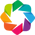

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
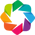

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


('egf_treated', 'untreated')
t_ion2nonan_sw 1.329179048538208
t_intensity_selection 18.978498697280884
t_ion2nonan_sw 1.231462001800537
t_intensity_selection 17.09388518333435


In [9]:
import alphaquant.benchm.benchmarking as aqbench
import numpy as np

diffions_real, normed_c1_real, normed_c2_real = aqbench.load_real_example_ions(input_file=INPUT_FILE,
samplemap_file=SAMPLEMAP,num_ions=np.inf, condpair = CONDPAIR, minrep = 5)


EGFR
P00533
207


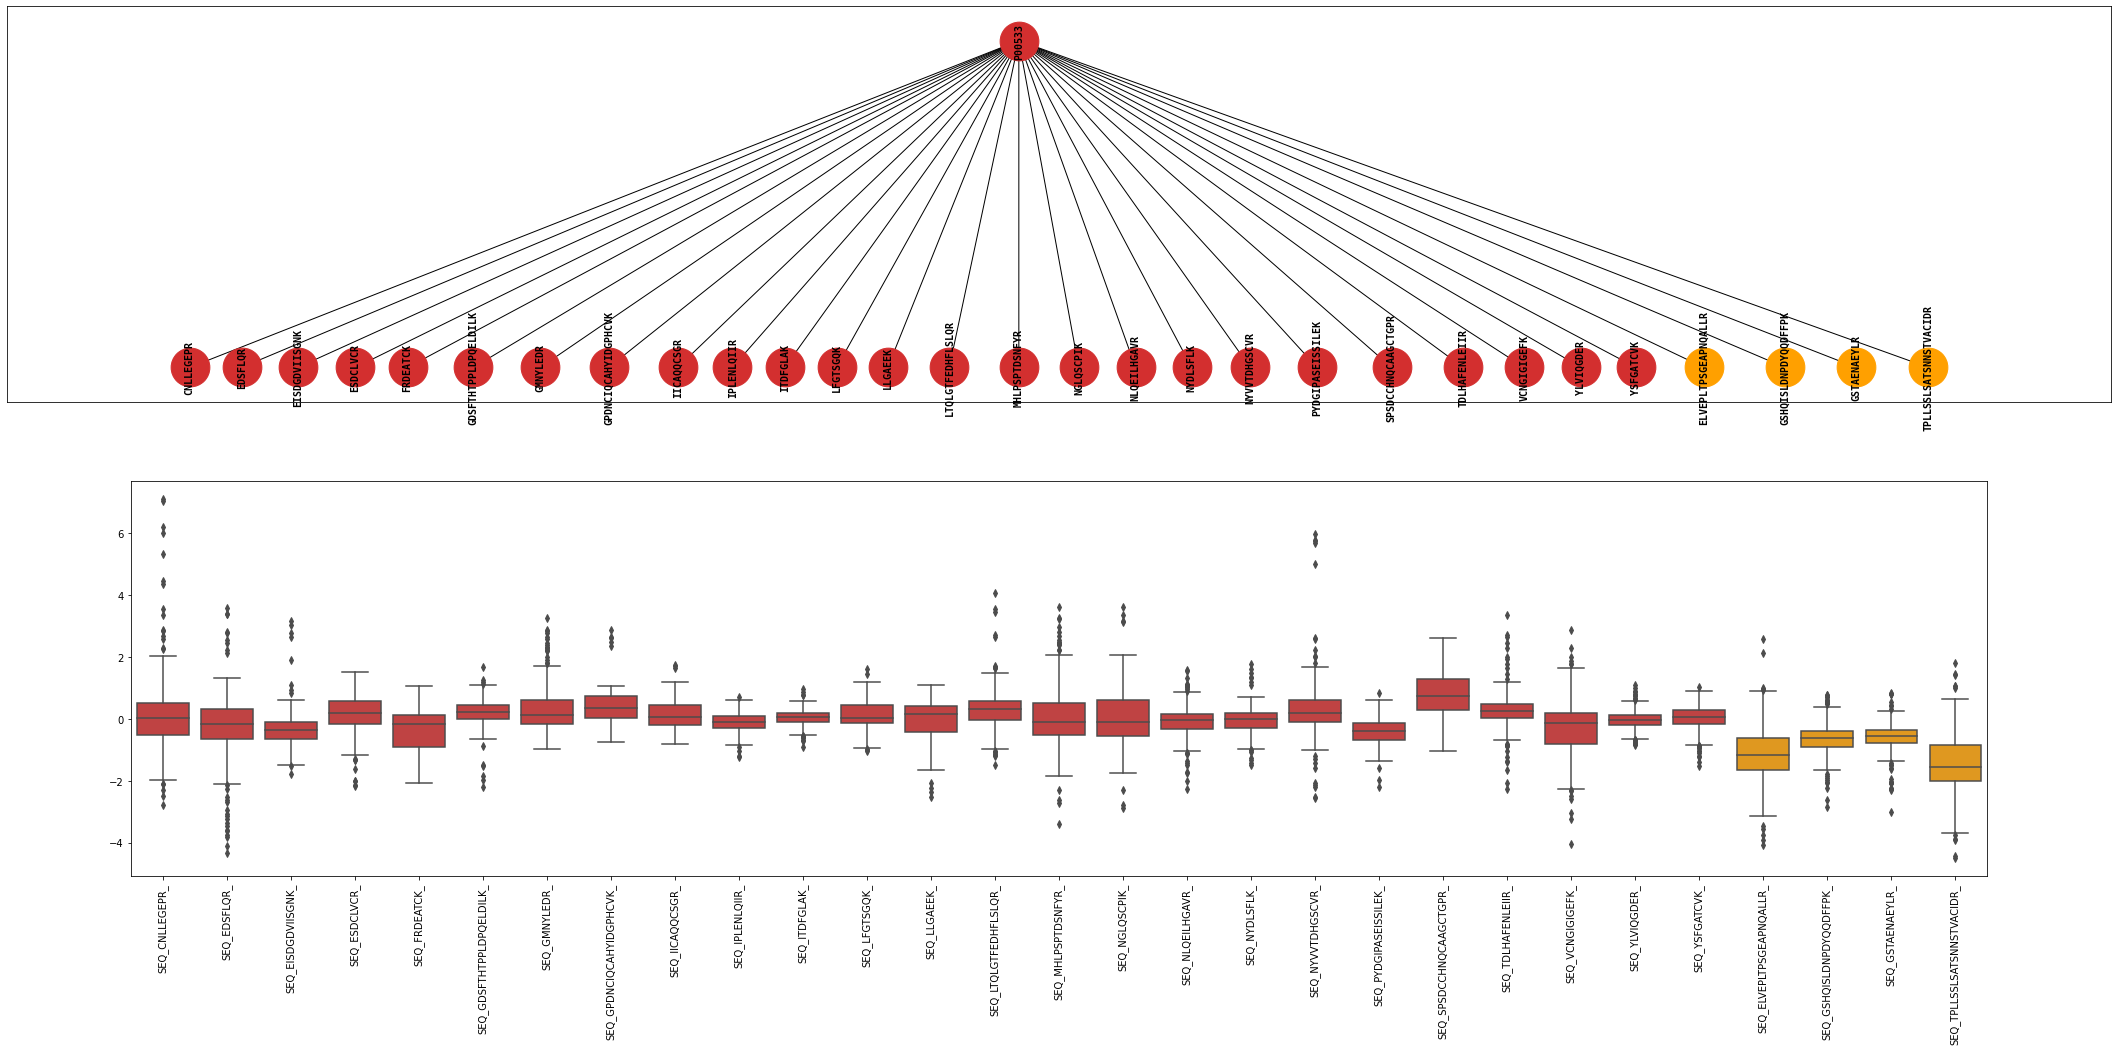

INPPL1
O15357
200


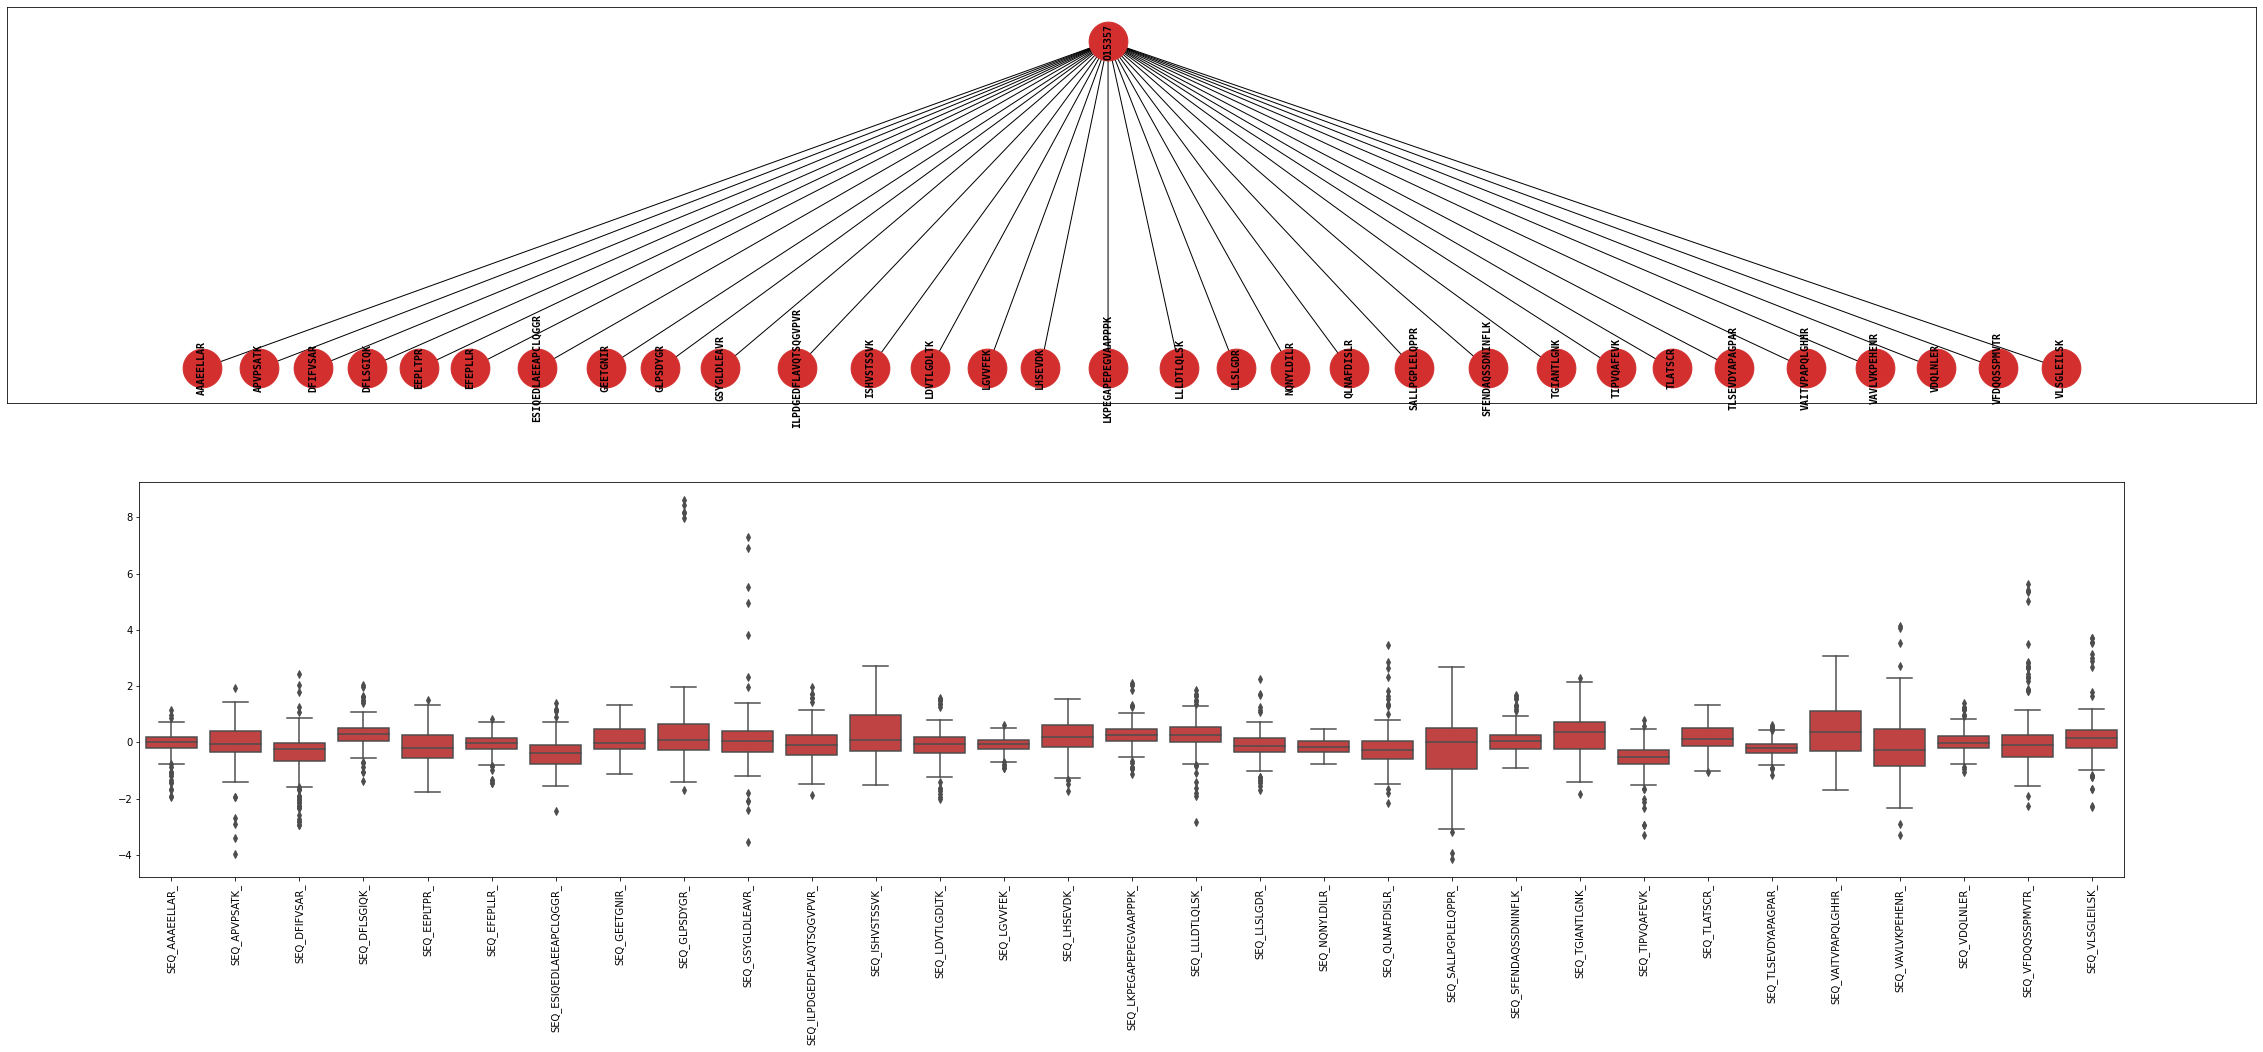

VASN
Q6EMK4
30


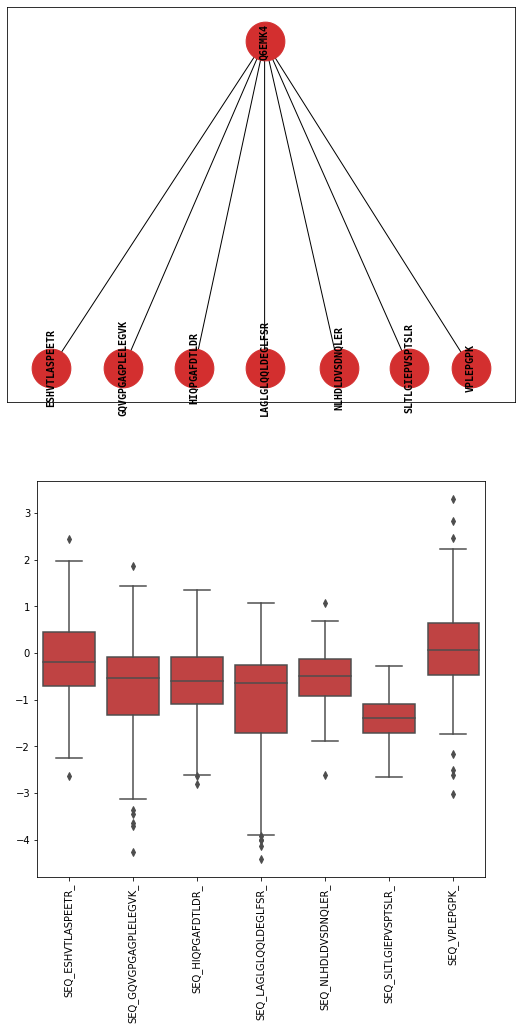

In [40]:
import matplotlib.pyplot as plt
import alphaquant.cluster.cluster_utils as aqcluster_utils
import alphaquant.cluster.cluster_ions as aqclust
import numpy as np
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as hierarchy
import alphaquant.diffquant.diffutils as aqdiffutils
import alphaquant.viz.tree_and_fc_viz as comboviz
import alphaquant.viz.fcviz as aqfcviz

import anytree

quantification_info = aqfcviz.CondpairQuantificationInfo(CONDPAIR, RESULTS_DIR, SAMPLEMAP)

def merge_similar_clusters(childnode2clust, type_node, fc_cutoff):
    clust2childnodes = aqdiffutils.invert_tuple_list_w_nonunique_values(childnode2clust)
    clust2fc = {}
    for clust, childnodes in clust2childnodes.items():
        clust2fc[clust] = np.median([x.fc for x in childnodes])

    clusters = list(clust2fc.keys())
    clust_idxs = [[x] for x in range(len(clust2fc.keys()))]

    condensed_distance_matrix = distance.pdist(clust_idxs, lambda idx1, idx2: compare_fcdistance(clusters, idx1, idx2, clust2fc, fc_cutoff))
    after_clust = hierarchy.complete(condensed_distance_matrix)
    clustered = hierarchy.fcluster(after_clust, 0.1, criterion='distance')
    
    aqcluster_utils.assign_clusterstats_to_type_node(type_node, clustered)

    childnode2clust = update_childnode2clust(childnode2clust, clusters, clustered)

    return childnode2clust



def compare_fcdistance(clusters, idx1, idx2, clust2fc,fc_cutoff):
    clust1 = clusters[idx1[0]]
    clust2 = clusters[idx2[0]]

    fc1 = clust2fc.get(clust1)
    fc2 = clust2fc.get(clust2)

    if abs(fc1-fc2) < fc_cutoff:
        return 0
    else:
        return 1


def update_childnode2clust(childnode2clust, old_clusters, new_clusters):
    old2new = dict(zip(old_clusters, new_clusters))
    childnode2clust_new = []
    for childnode, old_clust in childnode2clust:
        new_clust = old2new[old_clust]
        childnode2clust_new.append((childnode, new_clust))
    return childnode2clust_new

plotconfig = aqfcviz.PlotConfig()
plotconfig.add_stripplot = False
plotconfig.narrowing_factor_for_fcplot = 0
plotconfig.rescale_factor_y = 2
plotconfig.label_rotation = 90
#plotconfig.set_config_to_order_along_protein_sequence()

plotconfig.parent_level = "gene"



for type_node in selected_protein_nodes:
    symbol = protein2symbol[type_node.name]
    if symbol not in ["EGFR", "INPPL1", "VASN"]:
        continue

    print(symbol)
    print(type_node.name)
    print(len(type_node.leaves))
    type_node.parent.name = ""
    diffions_grouped = aqbench.get_grouped_diffions_for_node(type_node, diffions_real)
    childnode2clust = aqclust.find_fold_change_clusters(type_node, diffions_grouped, normed_c1_real, normed_c2_real, ION2DIFFIDIST, P2Z, DEEDPAIR2DOUBLEDIFFDIST, 
    pval_threshold_basis = 0.01, fcfc_threshold=0, take_median_ion = True) #the clustering is performed on the child nodes
    childnode2clust = aqclust.merge_similar_clusters(childnode2clust, type_node, fcdiff_cutoff_clustermerge=0.5)
    childnode2clust = aqclust.decide_cluster_order(type_node,childnode2clust)
    aqcluster_utils.annotate_mainclust_leaves(childnode2clust)
    aqcluster_utils.assign_cluster_number(type_node, childnode2clust)
    aqcluster_utils.aggregate_node_properties(type_node,only_use_mainclust=True, use_fewpeps_per_protein=True)

    #pcplotter = aqfcviz.ProteinClusterPlotter(type_node,CONDPAIR, pepdf_getter, parent_level = 'gene', add_stripplot = False)#mod_seq_charge
    #pcplotter.plot_all_child_elements()
    #pcplotter = aqfcviz.ProteinClusterPlotter(type_node,CONDPAIR, intensitydfgetter, parent_level = 'gene', add_stripplot = True)#mod_seq_charge

    combined_plotter = comboviz.CombinedTreeAndFCPlotter(type_node, quantification_info, plotconfig)
    #pcplotter.plot_all_child_elements()
    #plt.show()
    #combined_plotter.fig.savefig(f"{symbol}_fcplot.pdf", dpi=300)
    

In [11]:
    
class ProteinIntensityDfFormatter():
    def __init__(self, protein_node, normed_intensity_df, relevant_samples : list, ion_header = 'quant_id'):
        self._protein_node = protein_node
        self._normed_intensity_df = normed_intensity_df
        self._relevant_samples = relevant_samples
        
    
    def get_melted_protein_ion_intensity_table(self):
        protein_df = self._subset_dataframe_to_protein()
        return self._melt_protein_dataframe(protein_df)
        

    def _subset_dataframe_to_protein(self):
        return self._quantification_info.normed_df.xs(self._protein_node.name, level = 0)
    

    def _melt_protein_dataframe(self, protein_df):
        df_melted = pd.melt(protein_df.reset_index(), value_vars= self._relevant_samples, id_vars=[self._ion_header], value_name="intensity", var_name="sample")
        df_melted["condition"] = [self._quantification_info.sample2cond.get(x) for x in df_melted["sample"]]
        return df_melted

In [12]:
class ProteinIntensityDataFrameGetter():

    def __init__(self, protein_node, quantification_info, ion_header = 'quant_id'):
        self._protein_node = protein_node
        self._normed_intensity_df = quantification_info.normed_intensity_df
        self._relevant_samples = quantification_info.relevant_samples
        self._ion_header = ion_header

    def get_melted_df_all(self, specified_level):
        melted_df = ProteinIntensityDfFormatter( self._protein_node, self._normed_intensity_df, self._relevant_samples, self._ion_header).get_melted_protein_ion_intensity_table()
        melted_df = ProteinQuantDfAnnotator(self._quantification_info, protein_node, specified_level).get_annotated_melted_df(melted_df)
        return melted_df

    def get_melted_df_selected_peptides(self, protein_id, selected_peptides, specified_level):
        melted_df = self.get_melted_df_all(protein_id, specified_level)
        melted_df = melted_df[[x in selected_peptides for x in melted_df["specified_level"]]]
        return melted_df
    
    def get_melted_df_clusterdiffinfo(self, protein_id, clusterdiffinfo, specified_level):
        protein_node = self._get_protein_node(protein_id)
        melted_df = self.get_melted_df_all(protein_id, specified_level)
        melted_df =  ProteinQuantDfProteoformSubsetter(melted_df, protein_node, clusterdiffinfo).subset_melted_df_to_clusterdiffinfo()
        return melted_df

    def get_protein_diffresults(self, protein_id):
        return self._quantification_info.diffresults_df.loc[protein_id]
    
    def _get_protein_node(self, protein_id):
        return anytree.findall_by_attr(self._quantification_info.condpair_root_node, protein_id, maxlevel=2)[0]



class ProteinIntensityDfFormatter():
    def __init__(self, protein_node, normed_intensity_df, relevant_samples : list, ion_header = 'quant_id'):
        self._protein_node = protein_node
        self._normed_intensity_df = normed_intensity_df
        self._relevant_samples = relevant_samples
        self._ion_header = ion_header
        
    
    def get_melted_protein_ion_intensity_table(self):
        protein_df = self._subset_dataframe_to_protein()
        return self._melt_protein_dataframe(protein_df)
        

    def _subset_dataframe_to_protein(self):
        return self._quantification_info.normed_df.xs(self._protein_node.name, level = 0)
    

    def _melt_protein_dataframe(self, protein_df):
        df_melted = pd.melt(protein_df.reset_index(), value_vars= self._relevant_samples, id_vars=[self._ion_header], value_name="intensity", var_name="sample")
        df_melted["condition"] = [self._quantification_info.sample2cond.get(x) for x in df_melted["sample"]]
        return df_melted
    

In [13]:
#load regulated phosphopeps

condpairtree_ptm = aqutils.read_condpair_tree(cond1=CONDPAIR[1], cond2=CONDPAIR[0], results_folder=RESULTS_PHOSPHO)
print(condpairtree_ptm.children)


(AnyNode(cluster=-1, clustscore=181.98322552341097, cv=0.011633049772883224, fc=-0.9748875925499227, frac_mainclust=0.5, fraction_consistent=0.2895585317460318, is_included=True, min_intensity=457.9528049784079, min_reps=3.0, name='Q9Y6X9;Q9Y6X9-2', num_clusters=2, num_mainclusts=4, p_val=1e-16, type='gene', z_val=-8.222082216130435), AnyNode(cluster=-1, clustscore=137.67752024722932, cv=0.014466038439738357, fc=-0.05576712558086244, frac_mainclust=0.6, fraction_consistent=0.33190217391304344, is_included=True, min_intensity=1440.5502649043758, min_reps=3.0, name='Q9H910;Q9H910-3', num_clusters=2, num_mainclusts=3, p_val=0.1056188457601166, type='gene', z_val=-1.618203050107964), AnyNode(cluster=-1, clustscore=350.8777303483024, cv=0.041898514944057226, fc=0.2636056581037963, frac_mainclust=0.38461538461538464, fraction_consistent=0.189742016633464, is_included=True, min_intensity=1589.629884070482, min_reps=3.0, name='P10809', num_clusters=2, num_mainclusts=10, p_val=0.000113878308596

In [13]:
print(condpairtree_ptm)

AnyNode(name=['untreated', 'egf_treated'])


In [25]:
import anytree
from statsmodels.stats import multitest


def generate_alphamap_input_df_from_ptm_condpair_node(condpair_node_ptm):
    add_modseq_fdr(condpair_node_ptm)
    rows = []
    for protein in condpair_node_ptm.children:
        peptides = protein.children
        for peptide in peptides:
            pepseq_cleaned = aqutils.cut_trailing_parts_seqstring(peptide.name)
            for modseq in peptide.children:
                is_phosphopep = check_if_string_is_contained(modseq.name, ["[Phospho"])
                is_regulated = check_if_is_regulated(modseq, fc_threshold=-1, fdr_threshold=0.05)

                if is_phosphopep & is_regulated:
                    modseq_cleaned = aqutils.cut_trailing_parts_seqstring(modseq.name)
                    rows.append({"all_protein_ids": protein.name, "modified_sequence": modseq_cleaned, "naked_sequence": pepseq_cleaned})

    df = pd.DataFrame(rows)
    return df

def add_modseq_fdr(condpair_node_ptm):
    all_modseq_nodes = anytree.findall(condpair_node_ptm, filter_=lambda node: getattr(node, "type", "NA") == "mod_seq")
    
    pvalues = [node.p_val for node in all_modseq_nodes]
    
    _, pvals_adjusted, _, _ = multitest.multipletests(pvalues, method='fdr_bh')
    
    for node, fdr in zip(all_modseq_nodes, pvals_adjusted):
        node.fdr = fdr


def check_if_string_is_contained(sequence, substring_list):
    return any(substring in sequence for substring in substring_list)


def check_if_is_regulated(modseq_node, fc_threshold, fdr_threshold):
    return (modseq_node.fc < fc_threshold) & (modseq_node.fdr < fdr_threshold) #inverted FC because conpair is untreated - egf


df_alphamap_ptm = generate_alphamap_input_df_from_ptm_condpair_node(condpairtree_ptm)

display(df_alphamap_ptm)



all_protein_ids                                  modified_sequence  \
0          Q9Y6X9;Q9Y6X9-2  PAPLVQQLSPSLLPNSK_MOD__PAPLVQQLSPS[Phospho (ST...   
1          Q9Y6X9;Q9Y6X9-2  PAPLVQQLSPSLLPNSK_MOD__PAPLVQQLS[Phospho (STY)...   
2          P27824;P27824-2  SDAEEDGGTVSQEEEDRKPK_MOD__S[Phospho (STY)]DAEE...   
3          P27824;P27824-2  SDAEEDGGTVSQEEEDRKPK_MOD__S[Phospho (STY)]DAEE...   
4          P27824;P27824-2  SDAEEDGGTVSQEEEDRK_MOD__S[Phospho (STY)]DAEEDG...   
...                    ...                                                ...   
3825       O15018;O15018-2  EACGHVSGHCCPGGSRESPVTDIDSFIK_MOD__EAC[Carbamid...   
3826                Q8NB46      DAVSPFSFSLLK_MOD__DAVS[Phospho (STY)]PFSFSLLK   
3827  Q13066;Q6NT46;Q9UEU5  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR_MOD__YVEPPE...   
3828                Q8WV99  AQAVASTSTVPSPSQTMPSCTSPSR_MOD__AQAVASTSTVPSPSQ...   
3829                Q8WV99  AQAVASTSTVPSPSQTMPSCTSPSR_MOD__AQAVASTSTVPS[Ph...   

                          naked_sequence  
0                      PAPLVQQLSPSLLPNSK  
1                      PAPLVQQLSPSLLPNSK  
2                   SDAEEDGGTVSQEEEDRKPK  
3                   SDAEEDGGTVSQEEEDRKPK  
4                     SDAEEDGGTVSQEEEDRK  
...                                  ...  
3825        EACGHVSGHCCPGGSRESPVTDIDSFIK  
3826                        DAVSPFSFSLLK  
3827  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR  
3828           AQAVASTSTVPSPSQTMPSCTSPSR  
3829           AQAVASTSTVPSPSQTMPSCTSPSR  

[3830 rows x 3 columns]

In [20]:
import anytree
import pandas as pd
import alphaquant.utils.utils as aqutils

def generate_alphamap_input_df_from_proteome_condpair_node(condpair_node, cluster = 0):
    rows = []
    for protein in condpair_node.children:
        peptides = anytree.findall(protein, filter_=lambda node: node.type == 'seq')
        for peptide in peptides:
            if peptide.cluster == cluster:
                naked_sequence = aqutils.cut_trailing_parts_seqstring(peptide.name)
                rows.append({"all_protein_ids": protein.name, "modified_sequence": naked_sequence, "naked_sequence": naked_sequence})
        
    df = pd.DataFrame(rows)
    return df




df_alphamap_c1 = generate_alphamap_input_df_from_proteome_condpair_node(condpairtree_proteome, cluster=0)
df_alphamap_c2 = generate_alphamap_input_df_from_proteome_condpair_node(condpairtree_proteome, cluster=1)
df_alphamap_c3 = generate_alphamap_input_df_from_proteome_condpair_node(condpairtree_proteome, cluster=2)


In [15]:
from alphamap.preprocessing import format_input_data
from alphamap.organisms_data import import_fasta
from alphamap.organisms_data import import_uniprot_annotation

human_fasta = import_fasta('Human')
human_uniprot = import_uniprot_annotation('Human')



/Users/constantin/workspace/alphamap/alphamap/organisms_data.py:135: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  uniprot_file = pd.read_csv(os.path.join(DATA_PATH, uniprot_name))


In [53]:
display(human_fasta.get_by_id("P00533"))


Protein(description={'db': 'sp', 'id': 'P00533', 'entry': 'EGFR_HUMAN', 'name': 'Epidermal growth factor receptor', 'gene_id': 'EGFR', 'taxon': 'HUMAN', 'OS': 'Homo sapiens', 'OX': '9606', 'GN': 'EGFR', 'PE': 1, 'SV': 2}, sequence='MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEVVLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALAVLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDFQNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCNLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVVALGIGLFMRRRHIVRKRTLRRLLQERELVEPLTPSGEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIPVAIKELREATSPKANKEILDEAYVMAS

In [ ]:

formatted_phospho_data = format_input_data(df=df_alphamap_ptm, fasta = human_fasta, modification_exp = r'\[.*?\]')
formatted_proteome_data_c1 = format_input_data(df=df_alphamap_c1, fasta = human_fasta, modification_exp = r'\[.*?\]')
formatted_proteome_data_c2 = format_input_data(df=df_alphamap_c2, fasta = human_fasta, modification_exp = r'\[.*?\]')
formatted_proteome_data_c3 = format_input_data(df=df_alphamap_c3, fasta = human_fasta, modification_exp = r'\[.*?\]')

In [28]:
display(formatted_phospho_data)

unique_protein_id                                  modified_sequence  \
0               Q9Y6X9  PAPLVQQLSPSLLPNSK_MOD__PAPLVQQLSPS[Phospho (ST...   
1             Q9Y6X9-2  PAPLVQQLSPSLLPNSK_MOD__PAPLVQQLSPS[Phospho (ST...   
2               Q9Y6X9  PAPLVQQLSPSLLPNSK_MOD__PAPLVQQLS[Phospho (STY)...   
3             Q9Y6X9-2  PAPLVQQLSPSLLPNSK_MOD__PAPLVQQLS[Phospho (STY)...   
4               P27824  SDAEEDGGTVSQEEEDRKPK_MOD__S[Phospho (STY)]DAEE...   
...                ...                                                ...   
6252            Q13066  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR_MOD__YVEPPE...   
6253            Q6NT46  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR_MOD__YVEPPE...   
6254            Q9UEU5  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR_MOD__YVEPPE...   
6255            Q8WV99  AQAVASTSTVPSPSQTMPSCTSPSR_MOD__AQAVASTSTVPSPSQ...   
6256            Q8WV99  AQAVASTSTVPSPSQTMPSCTSPSR_MOD__AQAVASTSTVPS[Ph...   

                          naked_sequence       all_protein_ids  start  end  \
0                      PAPLVQQLSPSLLPNSK       Q9Y6X9;Q9Y6X9-2    687  703   
1                      PAPLVQQLSPSLLPNSK       Q9Y6X9;Q9Y6X9-2    625  641   
2                      PAPLVQQLSPSLLPNSK       Q9Y6X9;Q9Y6X9-2    687  703   
3                      PAPLVQQLSPSLLPNSK       Q9Y6X9;Q9Y6X9-2    625  641   
4                   SDAEEDGGTVSQEEEDRKPK       P27824;P27824-2    553  572   
...                                  ...                   ...    ...  ...   
6252  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR  Q13066;Q6NT46;Q9UEU5     15   48   
6253  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR  Q13066;Q6NT46;Q9UEU5     15   48   
6254  YVEPPEMIGPMRPEQFSDEVEPATPEEGEPATQR  Q13066;Q6NT46;Q9UEU5     15   48   
6255           AQAVASTSTVPSPSQTMPSCTSPSR                Q8WV99    151  175   
6256           AQAVASTSTVPSPSQTMPSCTSPSR                Q8WV99    151  175   

      PTMsites                                  PTMtypes  
0         [33]                         [[Phospho (STY)]]  
1         [33]                         [[Phospho (STY)]]  
2         [31]                         [[Phospho (STY)]]  
3         [31]                         [[Phospho (STY)]]  
4     [26, 36]        [[Phospho (STY)], [Phospho (STY)]]  
...        ...                                       ...  
6252      [63]                         [[Phospho (STY)]]  
6253      [63]                         [[Phospho (STY)]]  
6254      [63]                         [[Phospho (STY)]]  
6255  [50, 52]  [[Carbamidomethyl (C)], [Phospho (STY)]]  
6256  [42, 50]  [[Phospho (STY)], [Carbamidomethyl (C)]]  

[6232 rows x 8 columns]

In [29]:
display(formatted_phospho_data[formatted_phospho_data["unique_protein_id"] == "P00533"])

unique_protein_id                                  modified_sequence  \
3566            P00533    MHLPSPTDSNFYR_MOD__MHLPSPT[Phospho (STY)]DSNFYR   
3567            P00533  YSSDPTGALTEDSIDDTFLPVPEYINQSVPK_MOD__YSSDPTGAL...   
3568            P00533  YSSDPTGALTEDSIDDTFLPVPEYINQSVPK_MOD__Y[Phospho...   
3569            P00533  GSHQISLDNPDYQQDFFPK_MOD__GSHQISLDNPDY[Phospho ...   
3570            P00533        GSTAENAEYLR_MOD__GSTAENAEY[Phospho (STY)]LR   
3571            P00533  ELVEPLTPSGEAPNQALLR_MOD__ELVEPLTPS[Phospho (ST...   
3572            P00533  TPLLSSLSATSNNSTVACIDR_MOD__TPLLSS[Phospho (STY...   
3573            P00533                EDSFLQR_MOD__EDS[Phospho (STY)]FLQR   

                       naked_sequence all_protein_ids  start   end  PTMsites  \
3566                    MHLPSPTDSNFYR          P00533    986   998      [25]   
3567  YSSDPTGALTEDSIDDTFLPVPEYINQSVPK          P00533   1068  1098      [60]   
3568  YSSDPTGALTEDSIDDTFLPVPEYINQSVPK          P00533   1068  1098      [37]   
3569              GSHQISLDNPDYQQDFFPK          P00533   1160  1178      [36]   
3570                      GSTAENAEYLR          P00533   1188  1198      [25]   
3571              ELVEPLTPSGEAPNQALLR          P00533    686   704      [33]   
3572            TPLLSSLSATSNNSTVACIDR          P00533   1031  1051  [32, 44]   
3573                          EDSFLQR          P00533   1061  1067      [15]   

                                      PTMtypes  
3566                         [[Phospho (STY)]]  
3567                         [[Phospho (STY)]]  
3568                         [[Phospho (STY)]]  
3569                         [[Phospho (STY)]]  
3570                         [[Phospho (STY)]]  
3571                         [[Phospho (STY)]]  
3572  [[Phospho (STY)], [Carbamidomethyl (C)]]  
3573                         [[Phospho (STY)]]

In [61]:
from alphamap.sequenceplot import plot_peptide_traces, uniprot_color_dict
from alphamap.uniprot_integration import uniprot_feature_dict

plot_peptide_traces([formatted_proteome_data_c1, formatted_proteome_data_c2, formatted_proteome_data_c3],
                    name =[ 'cluster 1', 'cluster 2'],
                    protein = "P00533",
                    fasta = human_fasta,
                    uniprot=human_uniprot,
                    selected_features=['CHAIN','DOMAIN','STRUCTURE', 'MOD_RES'],
                    uniprot_feature_dict=uniprot_feature_dict, 
                    uniprot_color_dict=uniprot_color_dict)

In [ ]:
from alphamap.organisms_data import import_uniprot_annotation
from alphamap.sequenceplot import plot_peptide_traces, uniprot_color_dict
from alphamap.uniprot_integration import uniprot_feature_dict



plot_peptide_traces([formatted_proteome_data_c1, formatted_proteome_data_c2, formatted_proteome_data_c3],
                    name = 'proteome',
                    protein = "Q6EMK4",
                    fasta = human_fasta,
                    uniprot=human_uniprot,
                    selected_features=['CHAIN','DOMAIN','STRUCTURE', 'MOD_RES', 'TOPO_DOM'],
                    uniprot_feature_dict=uniprot_feature_dict, 
                    uniprot_color_dict=uniprot_color_dict)

In [ ]:
from alphamap.sequenceplot import plot_3d_structure, visualize_structure_in_panel

plot3D_html, js_path, cif_path = plot_3d_structure(df = [ formatted_proteome_data_c2, formatted_proteome_data_c3],
                    name = 'proteome',
                    protein = "P00533",  # Q9UPN3,  Q9Y2V2  A0A024RBG1
                    fasta = human_fasta,
                    selected_coloring = 'MS modified peptides', # 'Secondary structure','IDR','AlphaFold exposure', #'AlphaFold quality' 'MS peptides' 'MS modified peptides' 'MS PTMs'
                    dashboard = False)




In [39]:
visualize_structure_in_panel(plot3D_html, js_path, cif_path)

In [42]:
import re

def extract_string_level(s, lvl):
    patterns = {
        "lvl1": r"(SEQ_[^_]+_)",
        "lvl2": r"(SEQ_[^_]+_MOD__[^_]+__)",
        "lvl3": r"(SEQ_[^_]+_MOD__[^_]+__CHARGE_\d+_)",
        "lvl4": r"(SEQ_[^_]+_MOD__[^_]+__CHARGE_\d+_(?:FRGION|MS1ISOTOPES)_)",
        "lvl5": r"(SEQ_.+)"
    }

    match = re.search(patterns.get(lvl, ""), s)
    
    return match.group(1) if match else "Invalid Level"

# Test
s1 = "SEQ_AEASGEAADEADEADEE_MOD__AEASGEAADEADEADEE__CHARGE_2_FRGION_b10_noloss_1"
s2 = "SEQ_ISFQLSK_MOD__ISFQLSK__CHARGE_2_FRGION_y4_H2O_1"
s3 = "SEQ_LAGEFGLK_MOD__LAGEFGLK__CHARGE_2_MS1ISOTOPES_1"

for s in [s1, s2, s3]:
    print(f"String: {s}")
    for lvl in ["lvl1", "lvl2", "lvl3", "lvl4", "lvl5"]:
        print(f"{lvl}: {extract_string_level(s, lvl)}")
    print("-" * 80)


String: SEQ_AEASGEAADEADEADEE_MOD__AEASGEAADEADEADEE__CHARGE_2_FRGION_b10_noloss_1
lvl1: SEQ_AEASGEAADEADEADEE_
lvl2: SEQ_AEASGEAADEADEADEE_MOD__AEASGEAADEADEADEE__
lvl3: SEQ_AEASGEAADEADEADEE_MOD__AEASGEAADEADEADEE__CHARGE_2_
lvl4: SEQ_AEASGEAADEADEADEE_MOD__AEASGEAADEADEADEE__CHARGE_2_FRGION_
lvl5: SEQ_AEASGEAADEADEADEE_MOD__AEASGEAADEADEADEE__CHARGE_2_FRGION_b10_noloss_1
--------------------------------------------------------------------------------
String: SEQ_ISFQLSK_MOD__ISFQLSK__CHARGE_2_FRGION_y4_H2O_1
lvl1: SEQ_ISFQLSK_
lvl2: SEQ_ISFQLSK_MOD__ISFQLSK__
lvl3: SEQ_ISFQLSK_MOD__ISFQLSK__CHARGE_2_
lvl4: SEQ_ISFQLSK_MOD__ISFQLSK__CHARGE_2_FRGION_
lvl5: SEQ_ISFQLSK_MOD__ISFQLSK__CHARGE_2_FRGION_y4_H2O_1
--------------------------------------------------------------------------------
String: SEQ_LAGEFGLK_MOD__LAGEFGLK__CHARGE_2_MS1ISOTOPES_1
lvl1: SEQ_LAGEFGLK_
lvl2: SEQ_LAGEFGLK_MOD__LAGEFGLK__
lvl3: SEQ_LAGEFGLK_MOD__LAGEFGLK__CHARGE_2_
lvl4: SEQ_LAGEFGLK_MOD__LAGEFGLK__CHARGE_2_M